In [1]:
import numpy as np 
import pandas as pd 
#import os
#for dirname, _, filenames in os.walk('/kaggle/input/customers-dataset'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))
file_path = '/kaggle/input/customers-dataset/Customers.csv' ## Ruta correcta del archivo en el directorio input de Kaggle

In [2]:
pd.read_csv(file_path)


,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [3]:
import matplotlib.pyplot as plt 
import dask.dataframe as dd #https://www.dask.org/

In [4]:
df = pd.read_csv(file_path) # Cargar el archivo CSV con Dask


In [5]:
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [6]:
print(df.head()) ## Mostrar las primeras filas del dataset

   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size  
0     Healthcare                1            4  
1       Engineer                3            3  
2       Engineer                1            1  
3         Lawyer                0            2  
4  Entertainment                2            6  


In [7]:
print(df.dtypes) # Verificar el esquema del DataFrame

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income ($)          int64
Spending Score (1-100)     int64
Profession                object
Work Experience            int64
Family Size                int64
dtype: object


#Ejemplo 1: Filtrado de Datos

In [8]:
filtered_df = df[df['Age'] > 35] # Filtrar datos específicos (ejemplo: datos de un año particular) 
filtered_df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
8,9,Male,64,97000,3,Engineer,0,3
10,11,Male,67,7000,14,Engineer,1,3
12,13,Female,58,80000,15,Executive,0,5
14,15,Male,37,19000,13,Doctor,0,1
18,19,Male,52,20000,29,Entertainment,1,4
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


Ejemplo 2: Visualización de la distribución de la edad filtrada

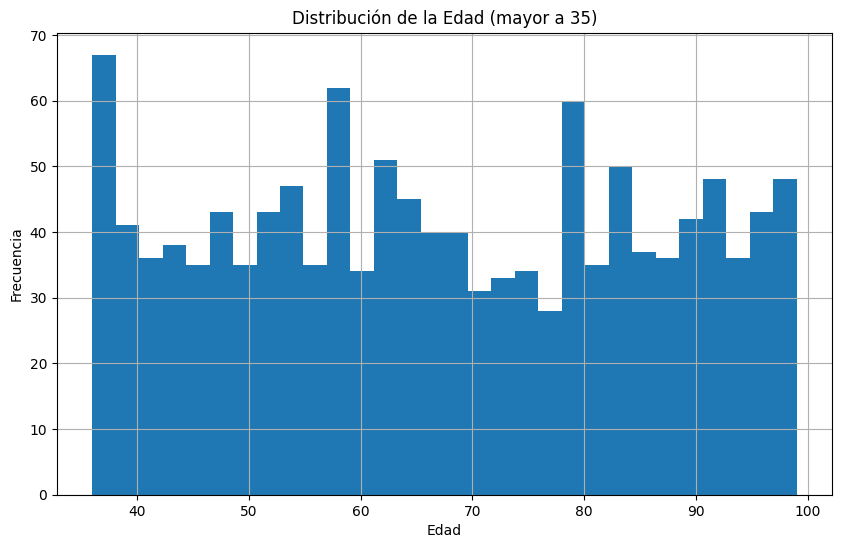

In [9]:
plt.figure(figsize=(10, 6))
filtered_df['Age'].hist(bins=30)
plt.title('Distribución de la Edad (mayor a 35)')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

Ejemplo 3: Estadísticas Descriptivas

In [10]:
summary = df.describe()
summary

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


Ejemplo 4: ingreso anual

Gender
Female    110553.715008
Male      110991.323096
Name: Annual Income ($), dtype: float64


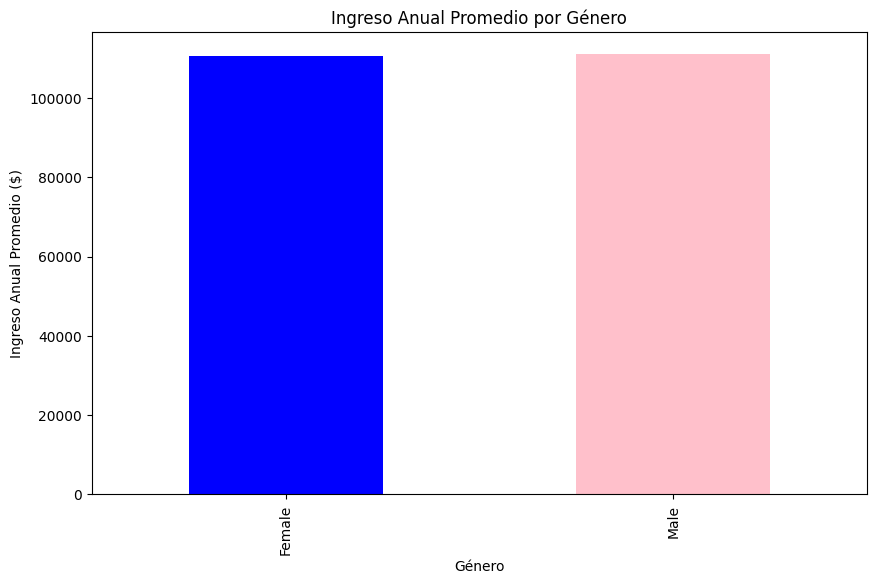

In [11]:
# Calcular el ingreso anual promedio por género
income_by_gender_mean = df.groupby('Gender')['Annual Income ($)'].mean()
print(income_by_gender_mean)

# Visualizar el ingreso anual promedio por género
income_by_gender_mean.plot(kind='bar', figsize=(10, 6), color=['blue', 'pink'])
plt.title('Ingreso Anual Promedio por Género')
plt.xlabel('Género')
plt.ylabel('Ingreso Anual Promedio ($)')
plt.show()


Ejemplo 5: Experiencia laboral y puntaje de gasto

                        Work Experience  Spending Score (1-100)
Work Experience                1.000000               -0.028948
Spending Score (1-100)        -0.028948                1.000000


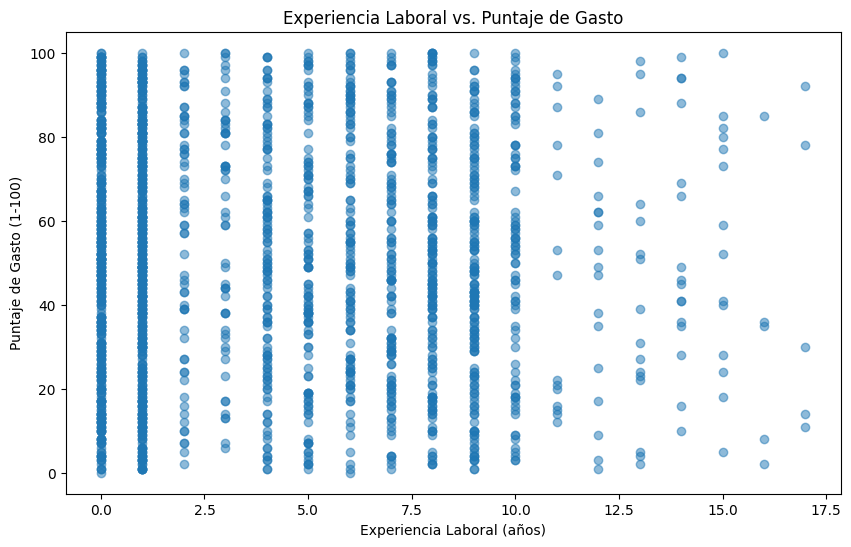

In [12]:
# Calcular la correlación entre experiencia laboral y puntaje de gasto
correlation = df[['Work Experience', 'Spending Score (1-100)']].corr()
print(correlation)

# Visualizar la relación con un scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Work Experience'], df['Spending Score (1-100)'], alpha=0.5)
plt.title('Experiencia Laboral vs. Puntaje de Gasto')
plt.xlabel('Experiencia Laboral (años)')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.show()

Ejemplo 6: Gasto y tamaño familiar

Family Size
1    49.645485
2    50.362881
3    51.951768
4    52.709343
5    52.178295
6    49.942387
7    49.991453
8    49.250000
9    17.000000
Name: Spending Score (1-100), dtype: float64


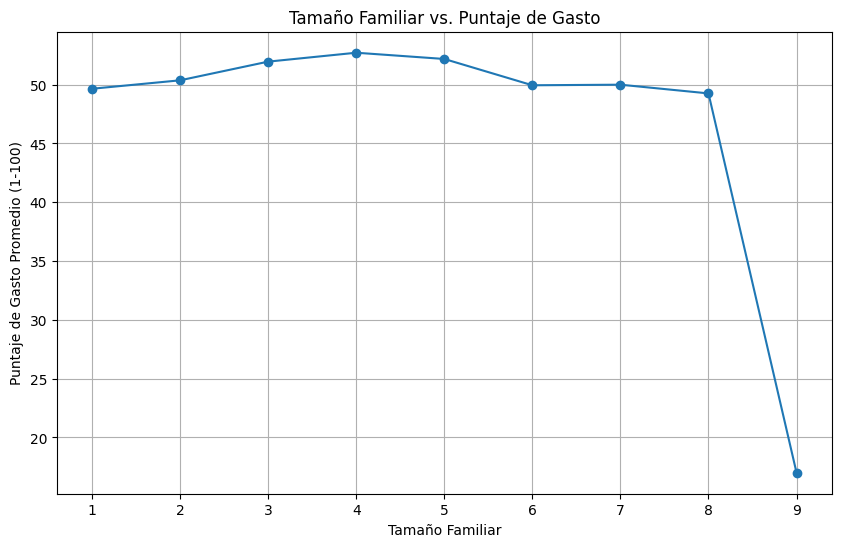

In [13]:
# Calcular la relación entre tamaño familiar y puntaje de gasto
family_size_vs_spending = df.groupby('Family Size')['Spending Score (1-100)'].mean()
print(family_size_vs_spending)

# Visualizar la relación con un line plot
family_size_vs_spending.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Tamaño Familiar vs. Puntaje de Gasto')
plt.xlabel('Tamaño Familiar')
plt.ylabel('Puntaje de Gasto Promedio (1-100)')
plt.grid(True)
plt.show()


Ejemplo 7: Distribución de profesiones

Profession
Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Name: count, dtype: int64


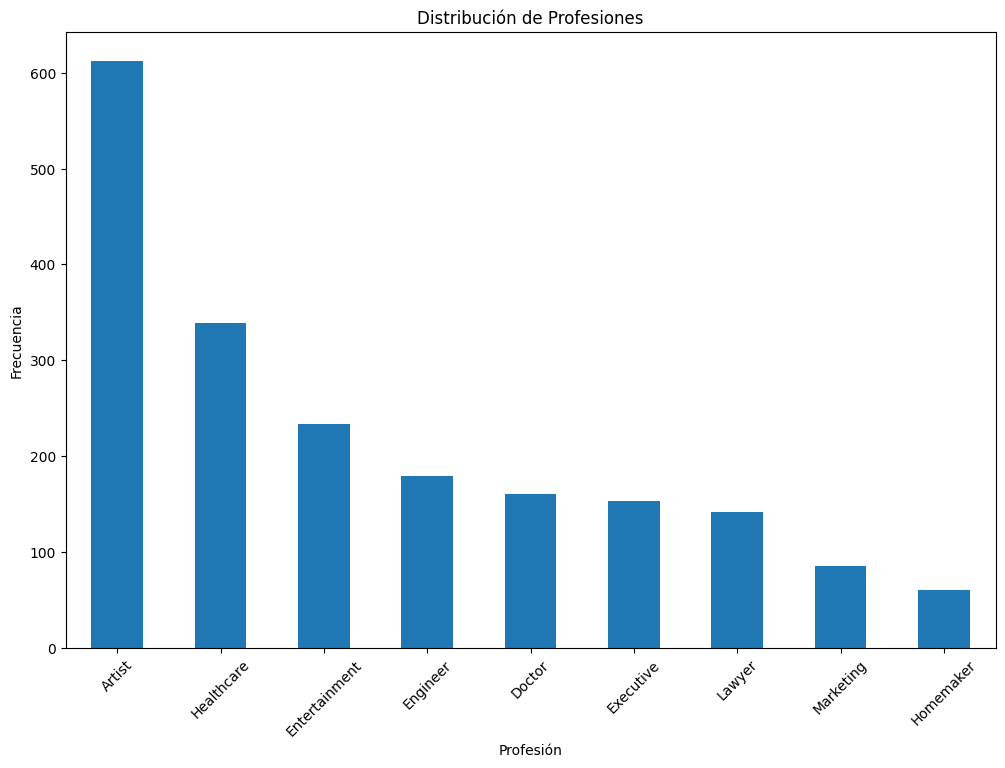

In [14]:
# Contar la frecuencia de cada profesión
profession_counts = df['Profession'].value_counts()
print(profession_counts)

# Visualizar la distribución de profesiones
profession_counts.plot(kind='bar', figsize=(12, 8))
plt.title('Distribución de Profesiones')
plt.xlabel('Profesión')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

Ejemplo 8: Ingreso Anual y Puntaje de Gasto por Edad

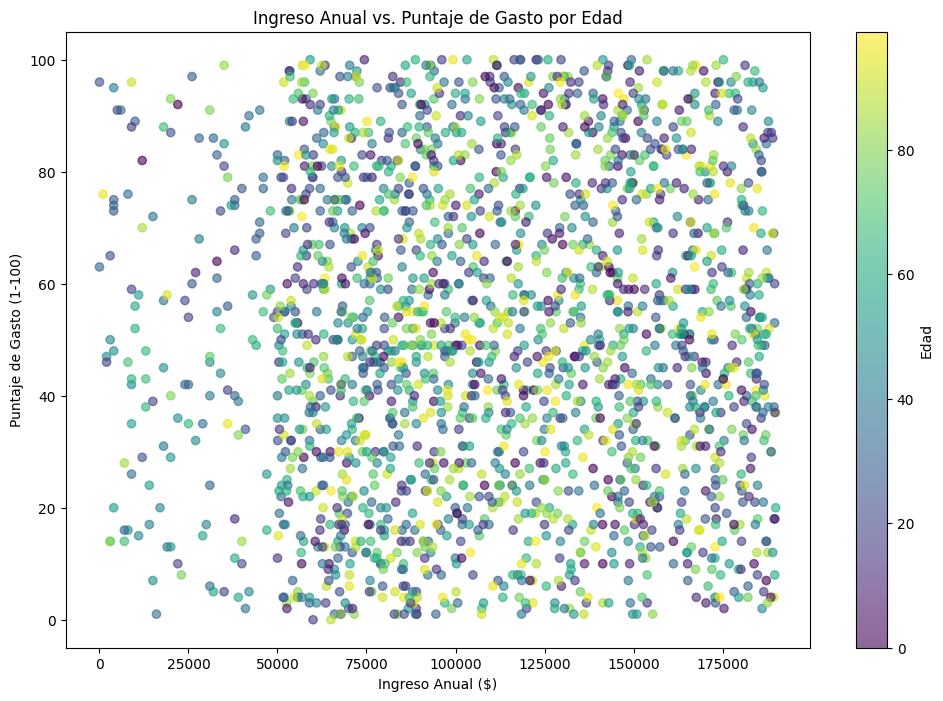

In [15]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Annual Income ($)'], df['Spending Score (1-100)'], 
                      c=df['Age'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Edad')
plt.title('Ingreso Anual vs. Puntaje de Gasto por Edad')
plt.xlabel('Ingreso Anual ($)')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.show()